The CRISP-DM method will be applied here to keep track of the analysis process.

In [59]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## 1. Business Understanding

Trying to discover something intersting inside the FIFA19 player data. 

Business Questions:

Question 1: Which Nation has most number of Soccer Players collected in FIFA 19, list the top 20 Nations

Question 2: How about the age distribution of the FIFA 19 Players? How is it related to player's wage?

Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage

Question 4: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage


## 2. Data Understanding

In [60]:
# load dataset
Fifa19_df = pd.read_csv('data.csv')
Fifa19_df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [61]:
# num of players
Fifa19_df.info

<bound method DataFrame.info of        Unnamed: 0      ID                  Name  Age  \
0               0  158023              L. Messi   31   
1               1   20801     Cristiano Ronaldo   33   
2               2  190871             Neymar Jr   26   
3               3  193080                De Gea   27   
4               4  192985          K. De Bruyne   27   
5               5  183277             E. Hazard   27   
6               6  177003             L. Modrić   32   
7               7  176580             L. Suárez   31   
8               8  155862          Sergio Ramos   32   
9               9  200389              J. Oblak   25   
10             10  188545        R. Lewandowski   29   
11             11  182521              T. Kroos   28   
12             12  182493              D. Godín   32   
13             13  168542           David Silva   32   
14             14  215914              N. Kanté   27   
15             15  211110             P. Dybala   24   
16             1

In [62]:
num_rows = Fifa19_df.shape[0] #Provide the number of rows    in the dataset
num_cols = Fifa19_df.shape[1] #Provide the number of columns in the dataset
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))

Row    number: 18207
Column number: 89


In [63]:
# To check the column names in the dataset
Fifa19_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## 3. Prepare Data

Some steps needed befor process the Data

* Drop unused columns

* Convert string values to number 

* Handle missing values, drop them if necessary

In [64]:
# Data Preparation Step 1: Drop the columns which will not be used in this project
Fifa19_df.drop('Photo',     axis = 1,inplace=True)
Fifa19_df.drop('Flag',      axis = 1,inplace=True)
Fifa19_df.drop('Club Logo', axis = 1,inplace=True)
Fifa19_df.drop('ID',        axis = 1,inplace=True)
Fifa19_df.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [65]:
# Data Preparation Step 2: Check whether any column has missing values
columns_with_missing_values = set(Fifa19_df.columns[Fifa19_df.isnull().mean()!=0])
print(columns_with_missing_values)

{'Release Clause', 'Real Face', 'CM', 'Body Type', 'CDM', 'Preferred Foot', 'CAM', 'RWB', 'LWB', 'Dribbling', 'FKAccuracy', 'Interceptions', 'SlidingTackle', 'Finishing', 'LB', 'RAM', 'RS', 'RM', 'StandingTackle', 'CF', 'Height', 'Composure', 'Loaned From', 'LongPassing', 'Jersey Number', 'Positioning', 'RDM', 'LCM', 'Skill Moves', 'CB', 'Acceleration', 'Balance', 'ShortPassing', 'LongShots', 'LF', 'Stamina', 'GKKicking', 'Jumping', 'GKPositioning', 'Vision', 'Agility', 'Work Rate', 'Crossing', 'SprintSpeed', 'ShotPower', 'GKReflexes', 'Strength', 'International Reputation', 'Volleys', 'Weak Foot', 'RB', 'RCB', 'HeadingAccuracy', 'LAM', 'RW', 'LM', 'GKHandling', 'Weight', 'Marking', 'LW', 'Contract Valid Until', 'LS', 'RF', 'LDM', 'Joined', 'Penalties', 'Club', 'GKDiving', 'ST', 'RCM', 'LCB', 'Position', 'Curve', 'BallControl', 'Reactions', 'Aggression'}


In [66]:
# Convert value/wage string to number
# Example: €110.5M -> 110.5 * 1000000
def str2number(amount):
    """
    This function convert amount string to float 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [67]:
# Data Preparation Step 3: Convert string values into numbers for Value & Wage

# Create New Wage_Number column to store numerical type Wage info
Fifa19_df['Wage_Number']  = Fifa19_df['Wage'].map(lambda x: str2number(x))

#Create New Value_Number column to store numerical type Value info
Fifa19_df['Value_Number'] = Fifa19_df['Value'].map(lambda x: str2number(x))

In [68]:
# Data Preparation Step 4: One-Hot Encoding for Categorical variables such as Club, Nationality

# One-hot encode the feature: "Club" , "Nationality" 
le = LabelEncoder()
Fifa19_df['Club_onehot_encode']               = le.fit_transform(Fifa19_df['Club'].astype(str))
Fifa19_df['Nationality_onehot_encode']        = le.fit_transform(Fifa19_df['Nationality'].astype(str))

### 4. Answer Questions base on dataset


#### Question 1: Which Nation has most number of Soccer Players collected in FIFA 18, list the top 20 Nations

England                1662
Germany                1198
Spain                  1072
Argentina               937
France                  914
Brazil                  827
Italy                   702
Colombia                618
Japan                   478
Netherlands             453
Sweden                  397
China PR                392
Chile                   391
Republic of Ireland     368
Mexico                  366
United States           353
Poland                  350
Norway                  341
Saudi Arabia            340
Denmark                 336
Name: Nationality, dtype: int64


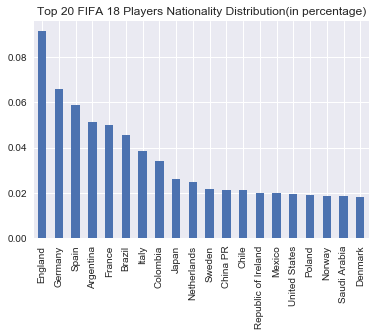

In [69]:
nationality_vals = Fifa19_df.Nationality.value_counts()
print(nationality_vals.head(20))

(nationality_vals.head(20)/Fifa19_df.shape[0]).plot(kind="bar");
plt.title("Top 20 FIFA 18 Players Nationality Distribution(in percentage)");

Question 1: Which Nation has most number of Soccer Players collected in FIFA 19, list the top 20 Nations

Answer: we can found England, Germany, Spain and Agentina are the top 4 nations have most players in FIFA 19

#### Question 2: How about the age distribution of the FIFA 19 Players?

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
Name: Age, dtype: int64


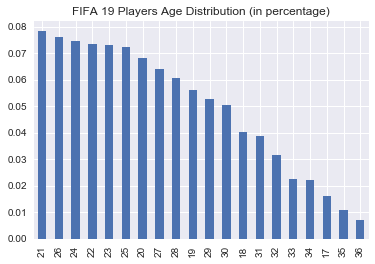

In [70]:
age_vals = Fifa19_df.Age.value_counts()
print(age_vals.head(20))

(age_vals.head(20)/Fifa19_df.shape[0]).plot(kind="bar");
plt.title("FIFA 19 Players Age Distribution (in percentage)");

In [71]:
age_vals = Fifa19_df.Age.value_counts()
age_vals.sort_index(ascending=True,inplace=True)

In [72]:
age_mean = Fifa19_df.groupby('Age').mean()

In [75]:
age_vals_list = age_vals.values.tolist()
age_overall_rating_list = age_mean['Wage_Number'].values.tolist()

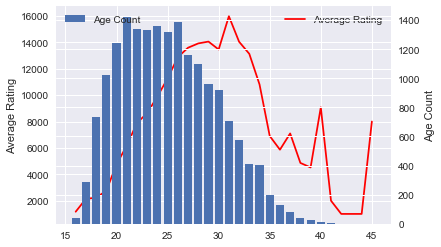

In [76]:
ages = age_vals.index.values.tolist()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(ages,age_overall_rating_list, color = 'red', label='Average Rating')
ax1.legend(loc=1)
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
plt.bar(ages, age_count_list, label='Age Count')
ax2.legend(loc=2)
ax2.set_ylabel('Age Count')
plt.show()

Question 2: How about the age distribution of the FIFA 19 Players? How is it related to player's wage?

Answer: most players are between 20–26 years old.However, the wage will increase around late 20s to early 30s, at the time when players gain enough experience and skills. The market will reflect palyer's value.

#### Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage

In [32]:
Value_Wage_DF = Fifa19_df[["Name", "Club", "Value_Number", "Wage_Number"]]
Value_Wage_DF.head()

,Name,Club,Value_Number,Wage_Number
0,L. Messi,FC Barcelona,110500000.0,565000.0
1,Cristiano Ronaldo,Juventus,77000000.0,405000.0
2,Neymar Jr,Paris Saint-Germain,118500000.0,290000.0
3,De Gea,Manchester United,72000000.0,260000.0
4,K. De Bruyne,Manchester City,102000000.0,355000.0


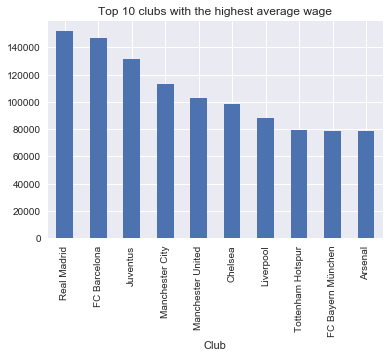

In [33]:
# Find out the top 10 clubs with the highest average wage
Value_Wage_DF.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wage");

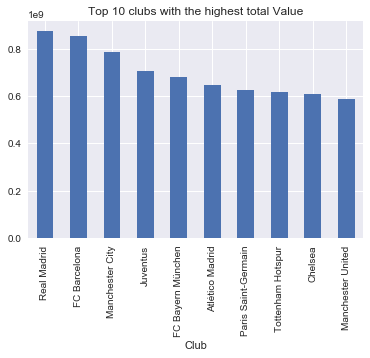

In [34]:
# Find out the top 10 clubs with the highest total player market value
Value_Wage_DF.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest total Value");

Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage

Answer: Football players of FC Barcelona, Real Madrid CF, Manchester City and Juventus have the most value clubs along with having most high earning players.

### Question 4: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage

In [42]:
Correlation_DF = Fifa19_df[['Name', 'Age', 'Overall', 'Potential', 'Club_onehot_encode', 'Nationality_onehot_encode', 'Special', 'Value_Number', 'Wage_Number']]

Correlation_DF.corr()

,Age,Overall,Potential,Club_onehot_encode,Nationality_onehot_encode,Special,Value_Number,Wage_Number
Age,1.000000,0.452350,-0.253312,0.001995,-0.030824,0.236695,0.075022,0.141145
Overall,0.452350,1.000000,0.660939,0.004888,-0.011851,0.606960,0.627085,0.571926
Potential,-0.253312,0.660939,1.000000,-0.009493,0.007352,0.383727,0.576218,0.486413
Club_onehot_encode,0.001995,0.004888,-0.009493,1.000000,0.008392,0.001655,-0.001411,-0.019516
Nationality_onehot_encode,-0.030824,-0.011851,0.007352,0.008392,1.000000,-0.005249,-0.009965,-0.020944
Special,0.236695,0.606960,0.383727,0.001655,-0.005249,1.000000,0.377738,0.347835
Value_Number,0.075022,0.627085,0.576218,-0.001411,-0.009965,0.377738,1.000000,0.858442
Wage_Number,0.141145,0.571926,0.486413,-0.019516,-0.020944,0.347835,0.858442,1.000000


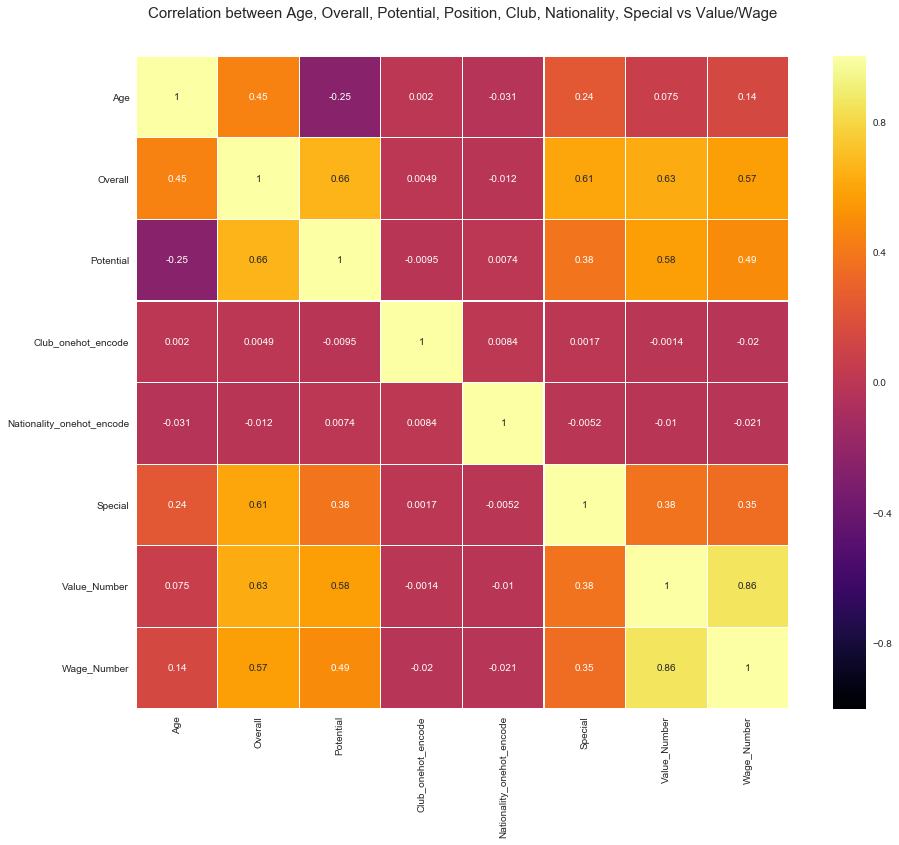

In [43]:
colormap = plt.cm.inferno
plt.figure(figsize=(16,12))
plt.title('Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage', y=1.05, size=15)
sns.heatmap(Correlation_DF.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Question 4: Correlation between Age, Overall, Potential, Position, Club, Nationality, Special vs Value/Wage

Answer: Overall & Potential are most postive related to Wage & Value, Wage and Value are highly correlated to each other.